# Análisis Exploratorio de datos (EDA)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Cálculo de estadísticos descriptivos

Cargamos el DF df_transacciones_EDA.csv

In [2]:
df = pd.read_csv("D:/Documentos/Pontia/Eleccion proyecto Jupiter/df_completo.csv")
df. head()

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude
0,0,PAYMENT,2022-09-01 08:00:00,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9839.64,False,False
1,1,PAYMENT,2022-09-01 08:00:00,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1864.28,False,False
2,2,TRANSFER,2022-09-01 08:00:00,C1305486145,181.0,0.00,C553264065,0.0,0.0,181.00,False,True
3,3,CASH_OUT,2022-09-01 08:00:00,C840083671,181.0,0.00,C38997010,21182.0,0.0,181.00,False,True
4,4,PAYMENT,2022-09-01 08:00:00,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,11668.14,False,False


In [3]:
df.shape # Ver la forma del DataFrame

(6362520, 12)

In [4]:
df.info() # Ver información sobre los tipos de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362520 entries, 0 to 6362519
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   t_id                  int64  
 1   tipo                  object 
 2   fecha_final           object 
 3   id_cliente_origen     object 
 4   balance_prev_origen   float64
 5   balance_post_origen   float64
 6   id_cliente_destino    object 
 7   balance_prev_destino  float64
 8   balance_post_destino  float64
 9   cuantia               float64
 10  mensaje_alarma        bool   
 11  es_fraude             bool   
dtypes: bool(2), float64(5), int64(1), object(4)
memory usage: 497.6+ MB


In [5]:
df.describe() # Resumen estadístico de las columnas numéricas

,t_id,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia
count,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06
mean,3.181312e+06,8.338892e+05,8.551206e+05,1.100707e+06,1.225002e+06,1.798620e+05
std,1.836730e+06,2.888257e+06,2.924063e+06,3.399201e+06,3.674152e+06,6.038617e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590656e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.338957e+04
50%,3.181316e+06,1.420800e+04,0.000000e+00,1.327077e+05,2.146622e+05,7.487271e+04
75%,4.771964e+06,1.073150e+05,1.442585e+05,9.430375e+05,1.111909e+06,2.087216e+05
max,6.362619e+06,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,9.244552e+07


## Detección de missing values

In [6]:
num_missing_values = df.isna().sum()

print(num_missing_values)

t_id                    0
tipo                    0
fecha_final             0
id_cliente_origen       0
balance_prev_origen     0
balance_post_origen     0
id_cliente_destino      0
balance_prev_destino    0
balance_post_destino    0
cuantia                 0
mensaje_alarma          0
es_fraude               0
dtype: int64


## Cálculo de correlación

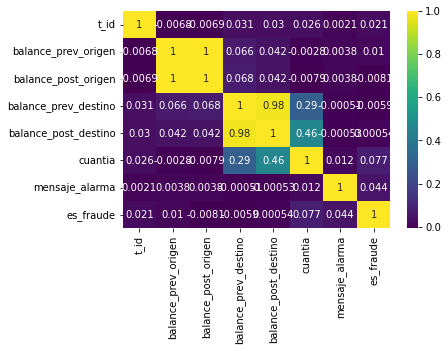

In [7]:
## Genera un heatmap para ver la correlación entre variables
corr = df.corr()
sns.heatmap(corr, cmap="viridis", annot=True)
plt.show()

## Análisis de Componentes Principales (PCA)

In [8]:
from sklearn.preprocessing import StandardScaler

#Este código elimina los valores faltantes, los valores atípicos y los registros duplicados, y 
#normalizará los datos para asegurarse de que todas las variables tengan la misma escala.

datos_sin_faltantes = df.dropna()
datos_sin_outliers = datos_sin_faltantes[(datos_sin_faltantes['cuantia'] < 100000) & (datos_sin_faltantes['balance_prev_origen'] < 100000) & (datos_sin_faltantes['balance_post_origen'] < 100000) & (datos_sin_faltantes['balance_prev_destino'] < 100000) & (datos_sin_faltantes['balance_post_destino'] < 100000)]
datos_sin_duplicados = datos_sin_outliers.drop_duplicates()

columnas_numericas = ['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino', 'balance_post_destino', 'cuantia']
datos_normalizados = StandardScaler().fit_transform(datos_sin_duplicados[columnas_numericas])


In [9]:
from sklearn.decomposition import PCA

#Este código aplica PCA para reducir el número de variables a dos componentes principales y
#creará un nuevo DataFrame llamado "nuevos_datos" con los valores de las dos componentes principales.

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_normalizados)
nuevos_datos = pd.DataFrame(data = componentes_principales, columns = ['PC1', 'PC2'])

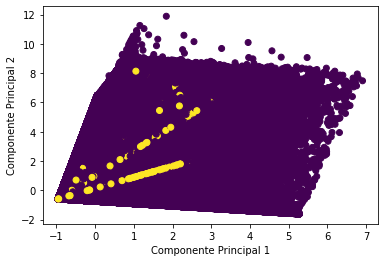

In [10]:
#Este código crea un gráfico de dispersión con los valores de las dos componentes principales y
#los colores correspondientes a la variable "es_fraude", lo que permitirá visualizar los patrones de comportamiento anormal.

plt.scatter(nuevos_datos['PC1'], nuevos_datos['PC2'], c=datos_sin_duplicados['es_fraude'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Visualización

Histogramas

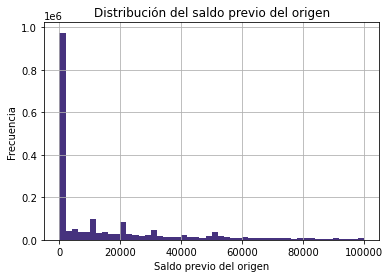

In [11]:

datos_sin_duplicados['balance_prev_origen'].hist(bins=50)
plt.title('Distribución del saldo previo del origen')
plt.xlabel('Saldo previo del origen')
plt.ylabel('Frecuencia')
plt.show()

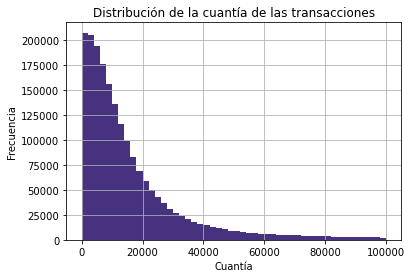

In [12]:
datos_sin_duplicados['cuantia'].hist(bins=50)
plt.title('Distribución de la cuantía de las transacciones')
plt.xlabel('Cuantía')
plt.ylabel('Frecuencia')
plt.show()

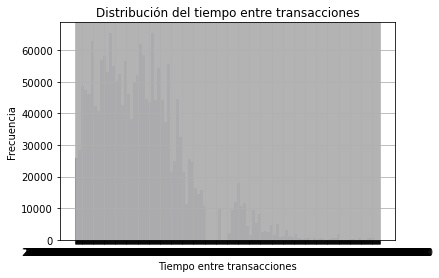

In [13]:
datos_sin_duplicados['fecha_final'].hist(bins=100)
plt.title('Distribución del tiempo entre transacciones')
plt.xlabel('Tiempo entre transacciones')
plt.ylabel('Frecuencia')
plt.show()


Gráficos de caja

In [14]:
# Seleccionamos las columnas numéricas del conjunto de datos
datos_numericos = df.select_dtypes(include=['float64', 'int64'])
datos_numericos.head()

,t_id,balance_prev_origen,balance_post_origen,balance_prev_destino,balance_post_destino,cuantia
0,0,170136.0,160296.36,0.0,0.0,9839.64
1,1,21249.0,19384.72,0.0,0.0,1864.28
2,2,181.0,0.00,0.0,0.0,181.00
3,3,181.0,0.00,21182.0,0.0,181.00
4,4,41554.0,29885.86,0.0,0.0,11668.14


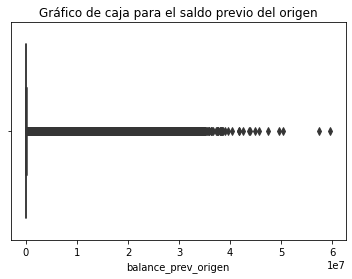

In [15]:
# Seleccionamos las columnas numéricas del conjunto de datos
datos_numericos = df.select_dtypes(include=['float64', 'int64'])

# Creamos un gráfico de caja para la variable 'balance_prev_origen'
sns.boxplot(x=datos_numericos['balance_prev_origen'])
plt.title('Gráfico de caja para el saldo previo del origen')
plt.show()

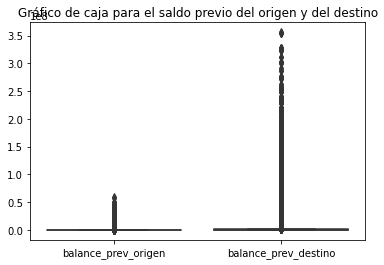

In [16]:
# Creamos un gráfico de caja para las variables 'balance_prev_origen' y 'balance_prev_destino'
sns.boxplot(data=df[['balance_prev_origen', 'balance_prev_destino']])
plt.title('Gráfico de caja para el saldo previo del origen y del destino')
plt.show()

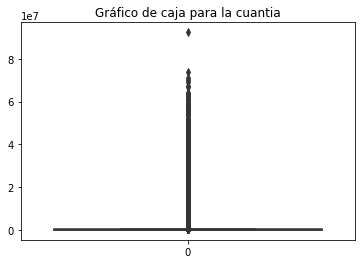

In [17]:
## Creamos un gráfico de caja para la variable 'cuantia'
sns.boxplot(data=df['cuantia'])
plt.title('Gráfico de caja para la cuantia')
plt.show()

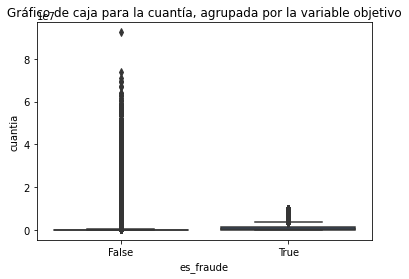

In [18]:
# Creamos un gráfico de caja para la variable 'cuantia', agrupando los datos por la variable 'es_fraude'
sns.boxplot(x='es_fraude', y='cuantia', data=df)
plt.title('Gráfico de caja para la cuantía, agrupada por la variable objetivo')
plt.show()

## Detección de outliers

In [19]:
from scipy import stats

z_scores = stats.zscore(datos_numericos)
outliers = datos_numericos[(z_scores > 3).any(axis=1)]

In [20]:
columnas_numericas = ['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino', 'balance_post_destino', 'cuantia']

for columna in columnas_numericas:
    Q1 = np.percentile(df[columna], 25)
    Q3 = np.percentile(df[columna], 75)
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5*IQR
    umbral_inferior = Q1 - 1.5*IQR
    outliers = df[(df[columna] > umbral_superior) | (df[columna] < umbral_inferior)]
    print('Columna {}: {} outliers detectados'.format(columna, len(outliers)))

Columna balance_prev_origen: 1112489 outliers detectados
Columna balance_post_origen: 1053378 outliers detectados
Columna balance_prev_destino: 786127 outliers detectados
Columna balance_post_destino: 738518 outliers detectados
Columna cuantia: 338071 outliers detectados


<AxesSubplot:>

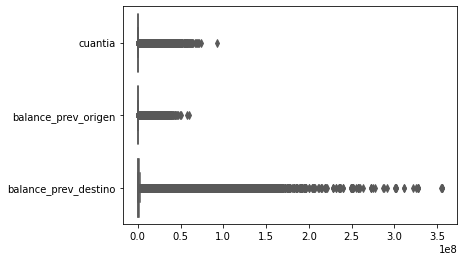

In [21]:
# Crear un subconjunto de datos con las variables relevantes
datos_relevantes = df[['cuantia', 'balance_prev_origen', 'balance_prev_destino']]

# Crear un gráfico de IQR para las variables relevantes
sns.boxplot(data=datos_relevantes, orient="h", palette="Set2")

## Análisis de la distribución de los datos

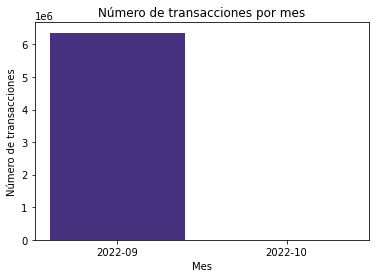

In [22]:
# Convertir la columna de fecha a formato de fecha
df['fecha_final'] = pd.to_datetime(df['fecha_final'])

# Agrupar las transacciones por mes y contar el número de transacciones en cada grupo
transacciones_por_mes = df.groupby(df['fecha_final'].dt.to_period('M')).count()['t_id']

# Crear un gráfico de barras para el número de transacciones por mes
plt.bar(transacciones_por_mes.index.astype(str), transacciones_por_mes.values)

# Agregar etiquetas al gráfico
plt.title('Número de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Número de transacciones')

# Mostrar el gráfico
plt.show()

In [23]:
# Agrupar las transacciones por fecha y contar el número de transacciones en cada grupo
transacciones_por_dia = df.groupby(df['fecha_final'].dt.date).count()['t_id'].reset_index()

transacciones_por_dia

,fecha_final,t_id
0,2022-09-01,348184
1,2022-09-02,474740
2,2022-09-03,207492
3,2022-09-04,304
4,2022-09-05,28911
5,2022-09-06,263143
6,2022-09-07,407760
7,2022-09-08,436243
8,2022-09-09,458978
9,2022-09-10,391853


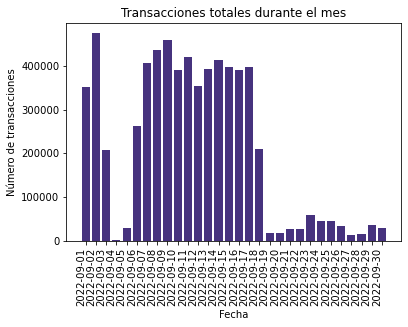

In [24]:
# Crear una columna de día
df['dia'] = df['fecha_final'].dt.day

# Contar el número de transacciones por día
transacciones_por_dia = df.groupby('dia').size().reset_index(name='total_transacciones')

# Crear una lista de fechas
fechas = [df[df['dia'] == dia]['fecha_final'].iloc[0].strftime('%Y-%m-%d') for dia in transacciones_por_dia['dia']]

# Crear el gráfico de barras
plt.bar(transacciones_por_dia['dia'], transacciones_por_dia['total_transacciones'])
plt.xticks(transacciones_por_dia['dia'], fechas, rotation=90, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Número de transacciones')
plt.title('Transacciones totales durante el mes')
plt.show()

Los resultados dicen que el dia 4 de Setiembre no hubo apenas transacciones. También cabe recalcar que a partir del día 18 el número de transacciones realizadas baja mucho.

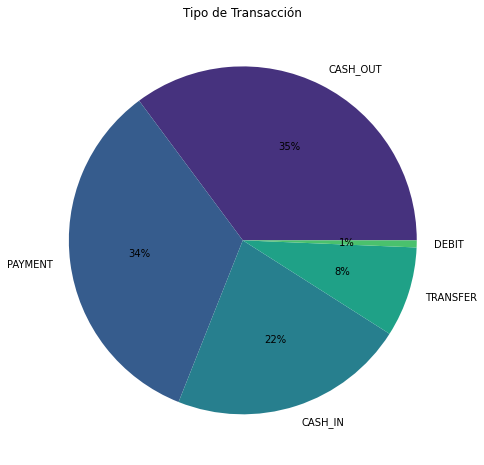

In [26]:
plt.figure(figsize=(10,8))
plt.pie(df.tipo.value_counts().values,labels=df.tipo.value_counts().index,  autopct='%.0f%%')
plt.title("Tipo de Transacción")
plt.show()

CASH_OUT    2237463
PAYMENT     2151458
CASH_IN     1399270
TRANSFER     532897
DEBIT         41432
Name: tipo, dtype: int64


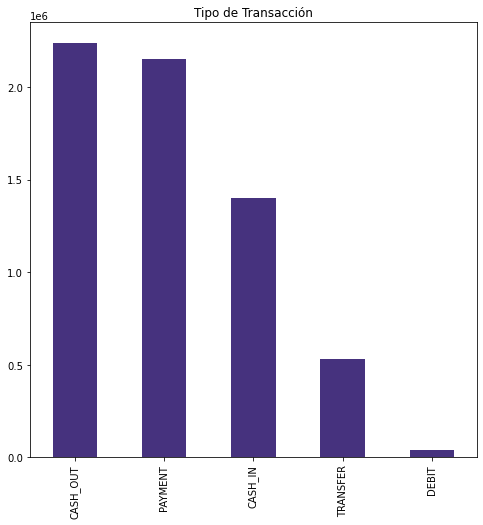

In [27]:
print(df.tipo.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.tipo.value_counts().plot(kind='bar', title="Tipo de Transacción", ax=ax, figsize=(8,8))
plt.show()

Text(0, 0.5, 'Numero de transacciones')

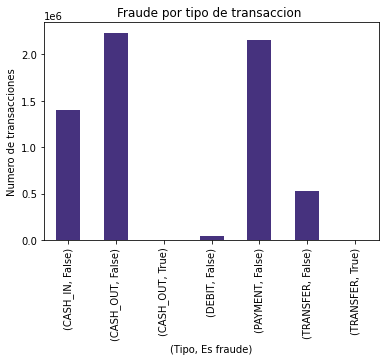

In [28]:
ax = df.groupby(['tipo', 'es_fraude']).size().plot(kind='bar')
ax.set_title("Fraude por tipo de transaccion ")
ax.set_xlabel("(Tipo, Es fraude)")
ax.set_ylabel("Numero de transacciones")

Con este resultado podemos concluir que las transaccionnes de tipo "CASH OUT" y "TRANSFER" son las que se han detectado como transacciones fraudulentas.

In [29]:
df_fraude= df[df['es_fraude']]


In [30]:
df_fraude['tipo'].value_counts()

CASH_OUT    4114
TRANSFER    4095
Name: tipo, dtype: int64

In [31]:
print('Cantidad de fraudes: ',df_fraude.shape[0])

Cantidad de fraudes:  8209


In [32]:
df_fraude['tipo'].value_counts(normalize=True)

CASH_OUT    0.501157
TRANSFER    0.498843
Name: tipo, dtype: float64

In [33]:
df_fraude["mensaje_alarma"].value_counts()

False    8193
True       16
Name: mensaje_alarma, dtype: int64

El sistema únicamente activó la alarma en 16 transacciones.

In [34]:
df_fraude[df_fraude['mensaje_alarma']]

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,dia
2741405,2736446,TRANSFER,2022-09-10 03:00:00,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,4953893.08,True,True,10
3252307,3247297,TRANSFER,2022-09-11 17:00:00,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1343002.08,True,True,11
3765113,3760288,TRANSFER,2022-09-12 22:00:00,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,536624.41,True,True,12
5565791,5563713,TRANSFER,2022-09-17 10:00:00,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,4892193.09,True,True,17
5997368,5996407,TRANSFER,2022-09-19 00:00:00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,10000000.00,True,True,19
5997370,5996409,TRANSFER,2022-09-19 00:00:00,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,9585040.37,True,True,19
6168988,6168499,TRANSFER,2022-09-24 09:00:00,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,3576297.10,True,True,24
6205812,6205439,TRANSFER,2022-09-25 17:00:00,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,353874.22,True,True,25
6266574,6266413,TRANSFER,2022-09-27 00:00:00,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,2542664.27,True,True,27
6281597,6281482,TRANSFER,2022-09-28 05:00:00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,10000000.00,True,True,28


In [35]:
df_fraude.describe(include='object').T

,count,unique,top,freq
tipo,8209,2,CASH_OUT,4114
id_cliente_origen,8209,8209,C1305486145,1
id_cliente_destino,8209,8165,C1827800010,2


Del nuevo dataset encontramos que el id_cliente C1827800010 aparece 2 veces como destino de transacciones.

## Análisis de la asimetría

### Skewness

Skewness es una medida de simetría, o más precisamente, la falta de simetría.   
Una distribución, o conjunto de datos, es simétrico si se ve igual a la izquierda y a la derecha del punto central.


Una asimetría igual a cero indica que la distribución es simétrica. Un valor positivo indica que la distribución tiene una cola positiva o está sesgada hacia la derecha, mientras que un valor negativo indica que la distribución tiene una cola negativa o está sesgada hacia la izquierda. En general, se considera que una distribución es simétrica si su asimetría está entre -0.5 y 0.5, moderadamente sesgada si su asimetría está entre -1 y -0.5 o entre 0.5 y 1, y muy sesgada si su asimetría es menor que -1 o mayor que 1.

In [36]:
from scipy.stats import skew

skewness =df.skew().sort_values(ascending =False)
skewness_df= pd.DataFrame({'skewness':skewness}) #Agregamos este paso para darle formato de DataFrame al resultado
skewness_df

,skewness
mensaje_alarma,630.598674
cuantia,30.993892
es_fraude,27.786112
balance_prev_destino,19.921694
balance_post_destino,19.352233
balance_prev_origen,5.249115
balance_post_origen,5.176862
dia,0.351518
t_id,-0.000002


## Análisis de curtosis

La curtosis es una medida estadística que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución de frecuencias. También es conocida como medida de apuntamiento.


Interpretación de la Curtosis:

g2-3 > 0 -> distribución leptocúrtica.

g2-3 = 0 -> distribución mesocúrtica (o normal).

g2-3 < 0 -> distribución platicúrtica.

In [37]:
from scipy.stats import kurtosis

kurtosis = df.kurtosis().sort_values(ascending=False)
kurtosis_df= pd.DataFrame({'kurtoisis': kurtosis})
kurtosis_df

,kurtoisis
mensaje_alarma,397652.812500
cuantia,1797.943395
balance_prev_destino,948.665491
balance_post_destino,862.148173
es_fraude,770.068289
balance_prev_origen,32.964589
balance_post_origen,32.066700
dia,0.267323
t_id,-1.199999
